# Evolutionary Algorithm Analysis

Import the libraries

In [1]:
import os
os.chdir('../../')
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt

Set the parameters

In [2]:
filename = './results/EA_individuals_mfgoc_fanin_50.csv'
number_of_parameters = 2
number_of_features = 2
parameters_to_plot_2D = [0,1]
selected_individuals = 10
min_parameter_values = numpy.array([4.4e-9,1.0])
max_parameter_values = numpy.array([6.2e-8,2.0])
labels = ['MF-GoC Max Weight (nS)', 'MF-GoC LTD/LTP ratio']

Read the file and load the EA data

In [3]:
data = numpy.loadtxt(filename)
print 'Loaded',data.shape[1],'columns and',data.shape[0],'rows'
parameters = data[:,:number_of_parameters]
output = data[:,number_of_parameters:]
hall_of_fame = numpy.argsort(output[:,0])[-selected_individuals:][::-1]
print 'Hall of fame:'
for pos, best_id in enumerate(hall_of_fame):
    print pos+1,". Parameters:",parameters[best_id,:],"Features:",output[best_id,:]

Loaded 4 columns and 1863 rows
Hall of fame:
1 . Parameters: [9.59593222e-10 1.91673177e+00] Features: [0.04187771 0.00806726]
2 . Parameters: [9.59593222e-10 1.41571794e+00] Features: [0.04079933 0.00460499]
3 . Parameters: [6.50367018e-10 1.71679667e+00] Features: [0.04072705 0.01315267]
4 . Parameters: [9.26668268e-10 1.93953104e+00] Features: [0.04066143 0.01045646]
5 . Parameters: [9.62516482e-10 1.85044882e+00] Features: [0.04043044 0.00479074]
6 . Parameters: [6.47767447e-10 1.62818160e+00] Features: [0.04042704 0.01069851]
7 . Parameters: [9.59593222e-10 1.83818030e+00] Features: [0.040426   0.00356191]
8 . Parameters: [9.35757010e-10 1.86529789e+00] Features: [0.04025796 0.00670053]
9 . Parameters: [9.59593222e-10 1.84725263e+00] Features: [0.04010595 0.00309071]
10 . Parameters: [9.79345128e-10 1.86366134e+00] Features: [0.03951062 0.00581297]


Plot the parameter and output distribution

<IPython.core.display.Javascript object>


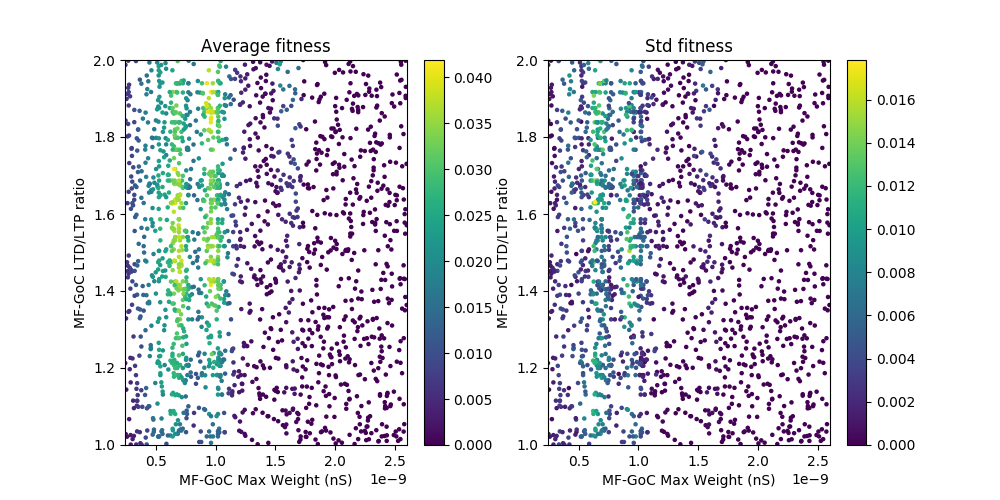

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,0])
plt.title('Average fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()
plt.subplot(1,2,2)
plt.scatter(parameters[:,parameters_to_plot_2D[0]],parameters[:,parameters_to_plot_2D[1]],s=5,c=output[:,1])
plt.title('Std fitness')
plt.xlabel(labels[parameters_to_plot_2D[0]])
plt.xlim(min_parameter_values[parameters_to_plot_2D[0]],max_parameter_values[parameters_to_plot_2D[0]])
plt.ylabel(labels[parameters_to_plot_2D[1]])
plt.ylim([min_parameter_values[parameters_to_plot_2D[1]],max_parameter_values[parameters_to_plot_2D[1]]])
plt.colorbar()
plt.show()

Plot multiscale scaling of the parameters

<IPython.core.display.Javascript object>


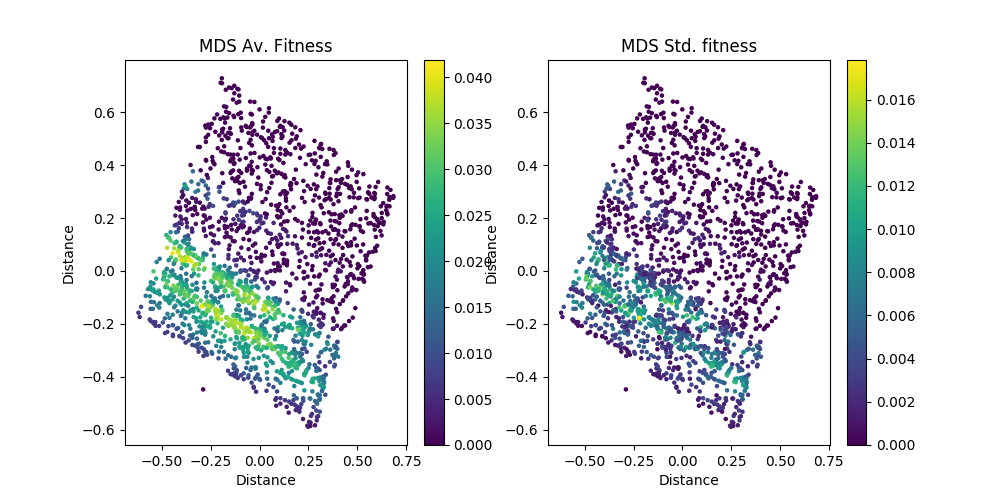

In [5]:
import sklearn.manifold
# Scale the parameters according to the search boundaries
scaled_parameters = (parameters-min_parameter_values)/(max_parameter_values-min_parameter_values)
mds = sklearn.manifold.MDS(number_of_parameters, max_iter=10000, n_init=1)
Y = mds.fit_transform(scaled_parameters)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,0])
plt.title('MDS Av. Fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(Y[:,0],Y[:,1],s=5,c=output[:,1])
plt.title('MDS Std. fitness')
plt.xlabel('Distance')
plt.ylabel('Distance')
plt.axis('tight')
plt.colorbar()
plt.show()